<a href="https://colab.research.google.com/github/triishita/AIOT_OpenVino/blob/TensorFlow/TensorFlow_advanced_openvino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os

In [ ]:
import pathlib
import tensorflow as tf
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" #getting the data from this link
data_dir = tf.keras.utils.get_file('flower_photos',origin=url,untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


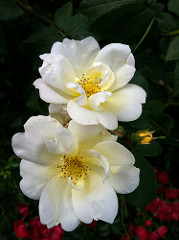

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/root/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

cv2_imshow(img)

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
# Training file
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=42,
                                                       subset='training',image_size=(180,180))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Validation file
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=42,
                                                       subset='validation',image_size=(180,180))

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_labels = train_ds.class_names
class_labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
# Training the model
import tensorflow as tf

final_model = tf.keras.models.Sequential() #model stored here

resnet_model = tf.keras.applications.ResNet50(include_top=False,classes=5,input_shape=(180,180,3))
for layer in resnet_model.layers:
  layer.trainable=False

final_model.add(resnet_model)

final_model.add(tf.keras.layers.Flatten())
final_model.add(tf.keras.layers.Dense(512,activation='relu'))
final_model.add(tf.keras.layers.Dense(5,activation='softmax'))
final_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 512)               37749248  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 61339525 (233.99 MB)
Trainable params: 37751813 (144.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
final_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# ValueError: Shapes (None, 1) and (None, 5) are incompatible

In [ ]:
history = final_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
92/92 [==============================] - 21s 149ms/step - loss: 6.8932 - accuracy: 0.7248 - val_loss: 1.5136 - val_accuracy: 0.8229
Epoch 2/10
92/92 [==============================] - 10s 103ms/step - loss: 0.3370 - accuracy: 0.9278 - val_loss: 0.9847 - val_accuracy: 0.8420
Epoch 3/10
92/92 [==============================] - 9s 99ms/step - loss: 0.0823 - accuracy: 0.9762 - val_loss: 1.2681 - val_accuracy: 0.8515
Epoch 4/10
92/92 [==============================] - 10s 101ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 1.4492 - val_accuracy: 0.8311
Epoch 5/10
92/92 [==============================] - 10s 104ms/step - loss: 0.0110 - accuracy: 0.9963 - val_loss: 1.2589 - val_accuracy: 0.8501
Epoch 6/10
92/92 [==============================] - 10s 103ms/step - loss: 0.0039 - accuracy: 0.9983 - val_loss: 1.2701 - val_accuracy: 0.8542
Epoch 7/10
92/92 [==============================] - 10s 105ms/step - loss: 5.1928e-04 - accuracy: 1.0000 - val_loss: 1.2263 - val_accuracy: 0.85

<Axes: >

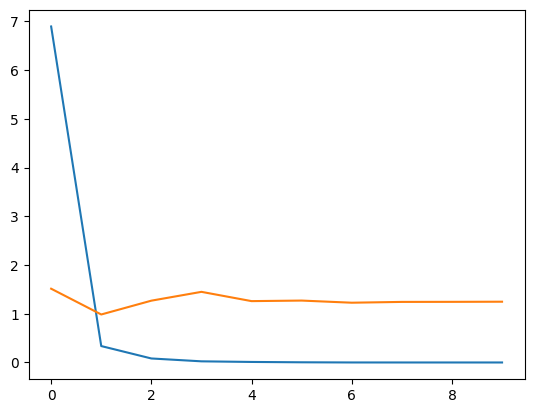

In [ ]:
import pandas as pd
pd.Series(history.history['loss']).plot(kind='line')
pd.Series(history.history['val_loss']).plot(kind='line')

In [ ]:
!wget https://t3.ftcdn.net/jpg/00/02/57/42/360_F_2574234_Us7MMOOQRSTUMsCi5TyrNtlHngY4Ry.jpg -O fl.jpg

--2024-03-06 09:18:38--  https://t3.ftcdn.net/jpg/00/02/57/42/360_F_2574234_Us7MMOOQRSTUMsCi5TyrNtlHngY4Ry.jpg
Resolving t3.ftcdn.net (t3.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t3.ftcdn.net (t3.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21962 (21K) [image/jpeg]
Saving to: ‘fl.jpg’

fl.jpg              100%[===================>]  21.45K  --.-KB/s    in 0.001s  

2024-03-06 09:18:38 (33.3 MB/s) - ‘fl.jpg’ saved [21962/21962]



In [ ]:
op = 'fl.jpg'

img_op = cv2.imread(op)
img_op = cv2.resize(img_op,(180,180))
img_op_n = np.expand_dims(img_op,axis=0)
img_op = final_model.predict(img_op_n)

1/1 [==============================] - 2s 2s/step


In [ ]:
op = class_labels[np.argmax(img_op)]
op

'dandelion'

In [ ]:
# Task : Apply openvino and do inference

In [ ]:
# Model was made using TensorFlow in the above steps now we convert it into a OpenVino model

In [ ]:
%pip install -q "openvino>=2023.1.0" #installing openvino

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 19.2 MB/s eta 0:00:00


In [ ]:
import openvino as ov
core = ov.Core()
core

<Core: available plugins[CPU]>

In [ ]:
# If you want to save and load on any machine, use this code
# we are using this 'convert' model so that at the end we have the required 'openvino' model, coz the 'openvino' is a model such that it runs on all devices irrespective of the apps and packages installed on that devices.
# we convert the model made above to OpenVino model
ir_model = ov.convert_model(final_model, input=[1,180,180,3])  #[1,180,180,3] means 4 dimensions are here
ov.save_model(ir_model,"flower.xml")
model = core.read_model('/content/flower.xml')
compiled_model = core.compile_model(model=model)
compiled_model

<CompiledModel:
inputs[
<ConstOutput: names[resnet50_input] shape[1,180,180,3] type: f32>
]
outputs[
<ConstOutput: names[dense_1/Softmax:0] shape[1,5] type: f32>
]>

In [ ]:

output_key = compiled_model.output(0)

print(output_key)
op = compiled_model(img_op_n)[output_key]
op = np.argmax(op)
class_labels[op]

<ConstOutput: names[dense_1/Softmax:0] shape[1,5] type: f32>


'dandelion'

In [ ]:
# Task: Write the code for local machine

# the thing about 'openvino' is that to run a afile on another system you don't need
# install every other pakages and files, you just need to hav ethe 'openvino'package
# of python installed

# To open the 'ipny' file here in(vs code), we've downloaded the code as well as the flower's '.bin' and '.xml' files also that came up in the folder section on the google collab.

In [ ]:
# We used this space to just make the model now we work on VSCode to infer the model